# **Step 1: Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 2: Import Libraries**


In [2]:
# Step 2: Import Libraries
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# **Mengatur Path Dataset**

In [4]:
source_dir = '/content/drive/MyDrive/CNN/bahan/'
train_dir = '/content/drive/MyDrive/CNN/latih/'
val_dir = '/content/drive/MyDrive/CNN/validasi/'

Pembagian Dataset ke folder latih dan validasi

In [ ]:
# Path ke folder bahan
source_dir = '/content/drive/MyDrive/path_to_your_dataset/folder bahan'

# Path tujuan
train_dir = '/content/drive/MyDrive/path_to_your_dataset/folder latih'
val_dir = '/content/drive/MyDrive/path_to_your_dataset/folder validasi'

# Tentukan proporsi untuk data latih dan validasi (misal 80% latih, 20% validasi)
train_split = 0.8

# Membuat folder tujuan jika belum ada
classes = ['Amoeba', 'Euglena', 'Hydra']

for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Dapatkan semua gambar dari setiap kelas
    class_path = os.path.join(source_dir, cls)
    images = os.listdir(class_path)

    # Acak gambar
    random.shuffle(images)

    # Hitung jumlah gambar untuk latih dan validasi
    train_size = int(len(images) * train_split)

    # Pindahkan gambar ke folder latih
    train_images = images[:train_size]
    val_images = images[train_size:]

    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, cls, img))

print("Pemisahan data selesai.")

# **Preprocessing Data untuk CNN**

Mengatur Preprocessing Data

In [28]:
# Membuat ImageDataGenerator untuk preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

Menyiapkan data pelatihan

In [29]:
# Menyiapkan data pelatihan
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Menyiapkan data validasi
validation_data = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 168 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


# **Membangun Model CNN**

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Menambahkan satu lapisan Conv2D
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),  # Meningkatkan unit pada Dense layer
    Dropout(0.5),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compiling Model**

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# **Melatih Model**

In [8]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.3088 - loss: 1.1195 - val_accuracy: 0.3333 - val_loss: 1.0974
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3330 - loss: 1.0974 - val_accuracy: 0.3810 - val_loss: 1.0969
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3174 - loss: 1.1033 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3968 - loss: 1.0900 - val_accuracy: 0.4524 - val_loss: 1.0920
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3752 - loss: 1.1048 - val_accuracy: 0.3810 - val_loss: 1.0831
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.3924 - loss: 1.0944 - val_accuracy: 0.4762 - val_loss: 1.0728
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3689 - loss: 1.0703 - val_accuracy: 0.5476 - val_loss: 1.0635
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5160 - loss: 1.0503 - val_accuracy: 0.5238 - val_loss: 1.0539
Epoch 9/20
6/6 ━━━━━

# Step 8: Evaluasi Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6002 - loss: 0.9033


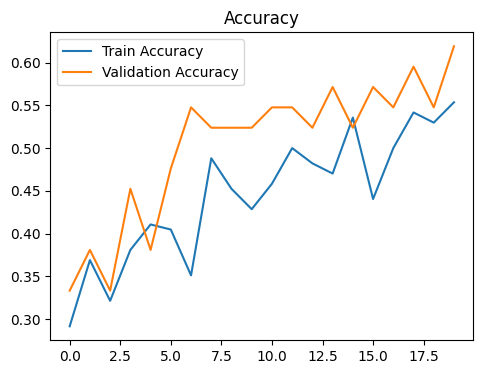

In [30]:
val_loss, val_accuracy = model.evaluate(validation_data)

# Menampilkan grafik akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

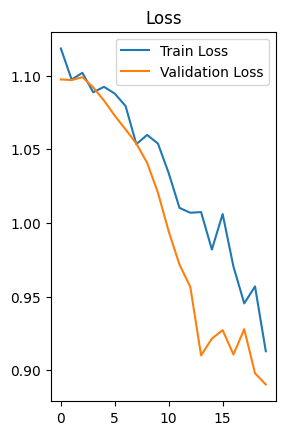

In [10]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

Text(value='', description='Image Path:', placeholder='/content/drive/MyDrive/path_to_your_image.jpg')

Button(description='Analyze Image', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


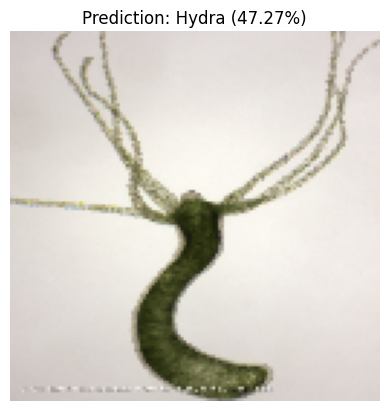

In [26]:
# Import library untuk widgets
from ipywidgets import widgets
from IPython.display import display
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menganalisis gambar
def analyze_image(image_path, model, class_names=['Amoeba', 'Euglena', 'Hydra']):
    # Memuat dan mengubah ukuran gambar
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

    # Prediksi kelas
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Menampilkan hasil
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class} ({confidence:.2f}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Fungsi untuk menjalankan analisis saat button diklik
def on_button_clicked(b):
    image_path = input_image_path.value  # Ambil path dari input widget
    analyze_image(image_path, model)

# Input widget untuk path gambar
input_image_path = widgets.Text(
    description="Image Path:",
    placeholder='/content/drive/MyDrive/path_to_your_image.jpg'
)

# Button untuk memulai analisis
button = widgets.Button(description="Analyze Image")
button.on_click(on_button_clicked)

# Display widgets
display(input_image_path, button)
